<a href="https://colab.research.google.com/github/MaliniVibin1502/pythonprojects/blob/main/Automobilesales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a data visualisation dashboard that is created using various Python libraries like pandas, matplotlib, seaborn, plotly and dash. The data used was received from the IBM Data Science certificate course and the project was one of the final assignments.

The data describes the automobile sales during recesssion period and answers to the questions presented during the assignment.

recession period 1 - year 1980
recession period 2 - year 1981 to 1982
recession period 3 - year 1991
recession period 4 - year 2000 to 2001
recession period 5 - year end 2007 to mid 2009
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)

The dataset used for this visualization assignment contains historical_automobile_sales data representing automobile sales and related variables during recession and non-recession period.


In [ ]:
%pip install seaborn
%pip install folium

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/MaliniVibin1502/pythonprojects/main/data/historical_automobile_sales.csv')
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

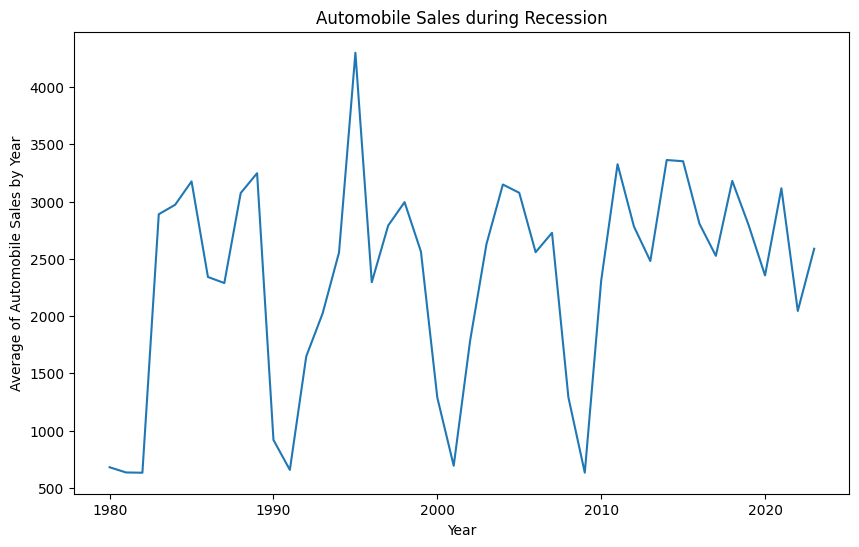

In [ ]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10,6))
df_line.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average of Automobile Sales by Year')
plt.title('Automobile Sales during Recession')
plt.show()

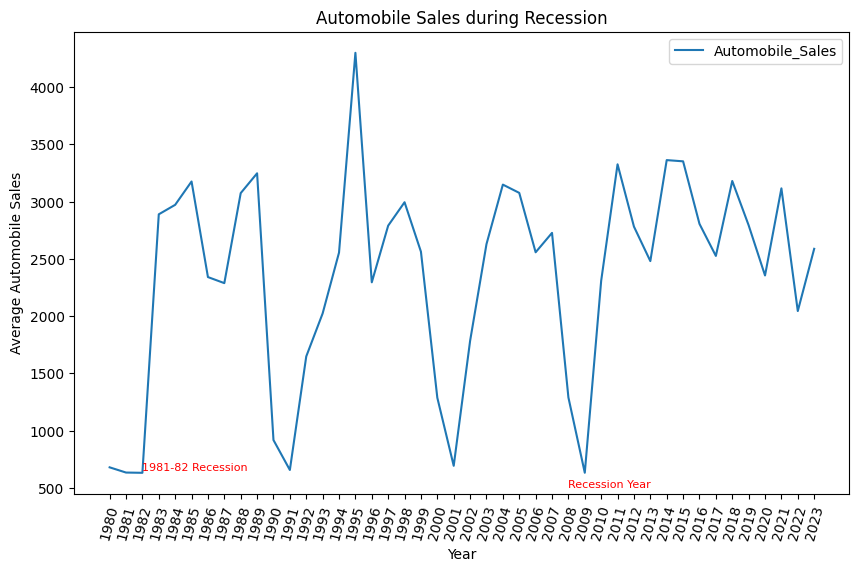

In [ ]:
plt.figure(figsize=(10, 6))
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
df_line.plot(kind='line')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Automobile Sales during Recession')

plt.text(1982, 650, '1981-82 Recession', fontsize=8, color='red')

plt.text(2008, 500, 'Recession Year', fontsize=8, color='red')

plt.legend()
plt.show()

 Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

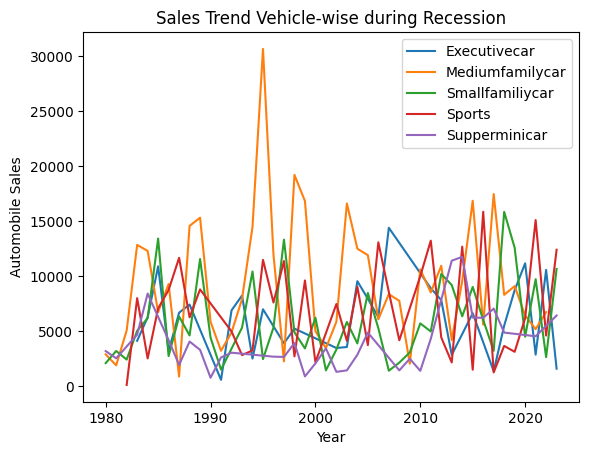

In [ ]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods

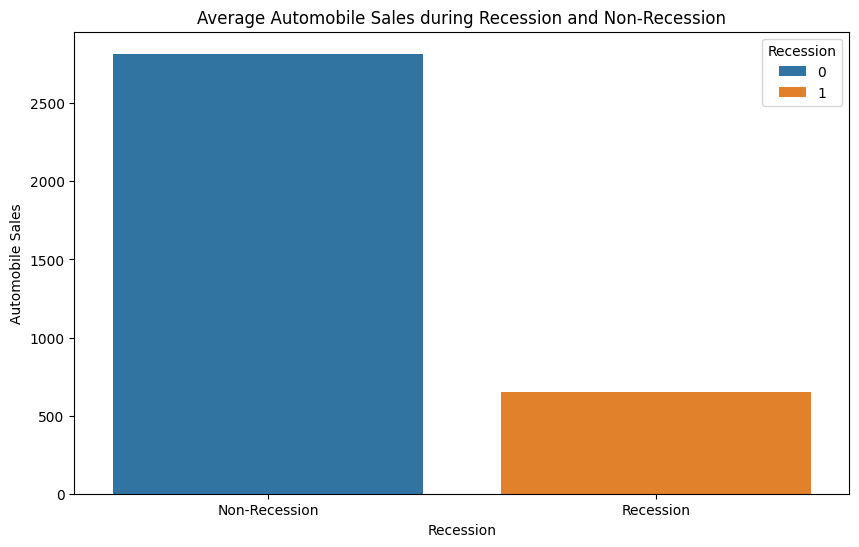

In [ ]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

Compare the sales of different vehicle types during a recession and a non-recession period

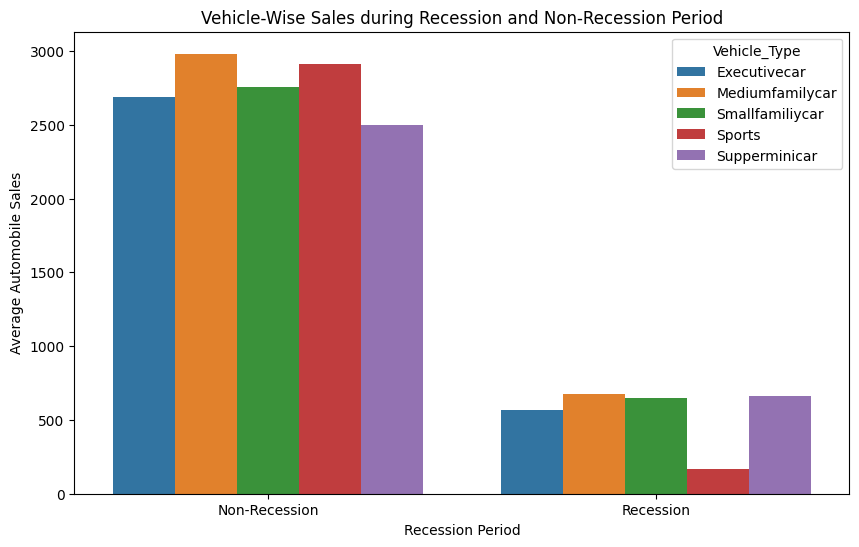

In [ ]:
recession_data = df[df['Recession'] == 1]

# Group the data by 'Recession', 'Vehicle_Type', and calculate the average 'Automobile_Sales'
sales_by_vehicle_type = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=sales_by_vehicle_type)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period

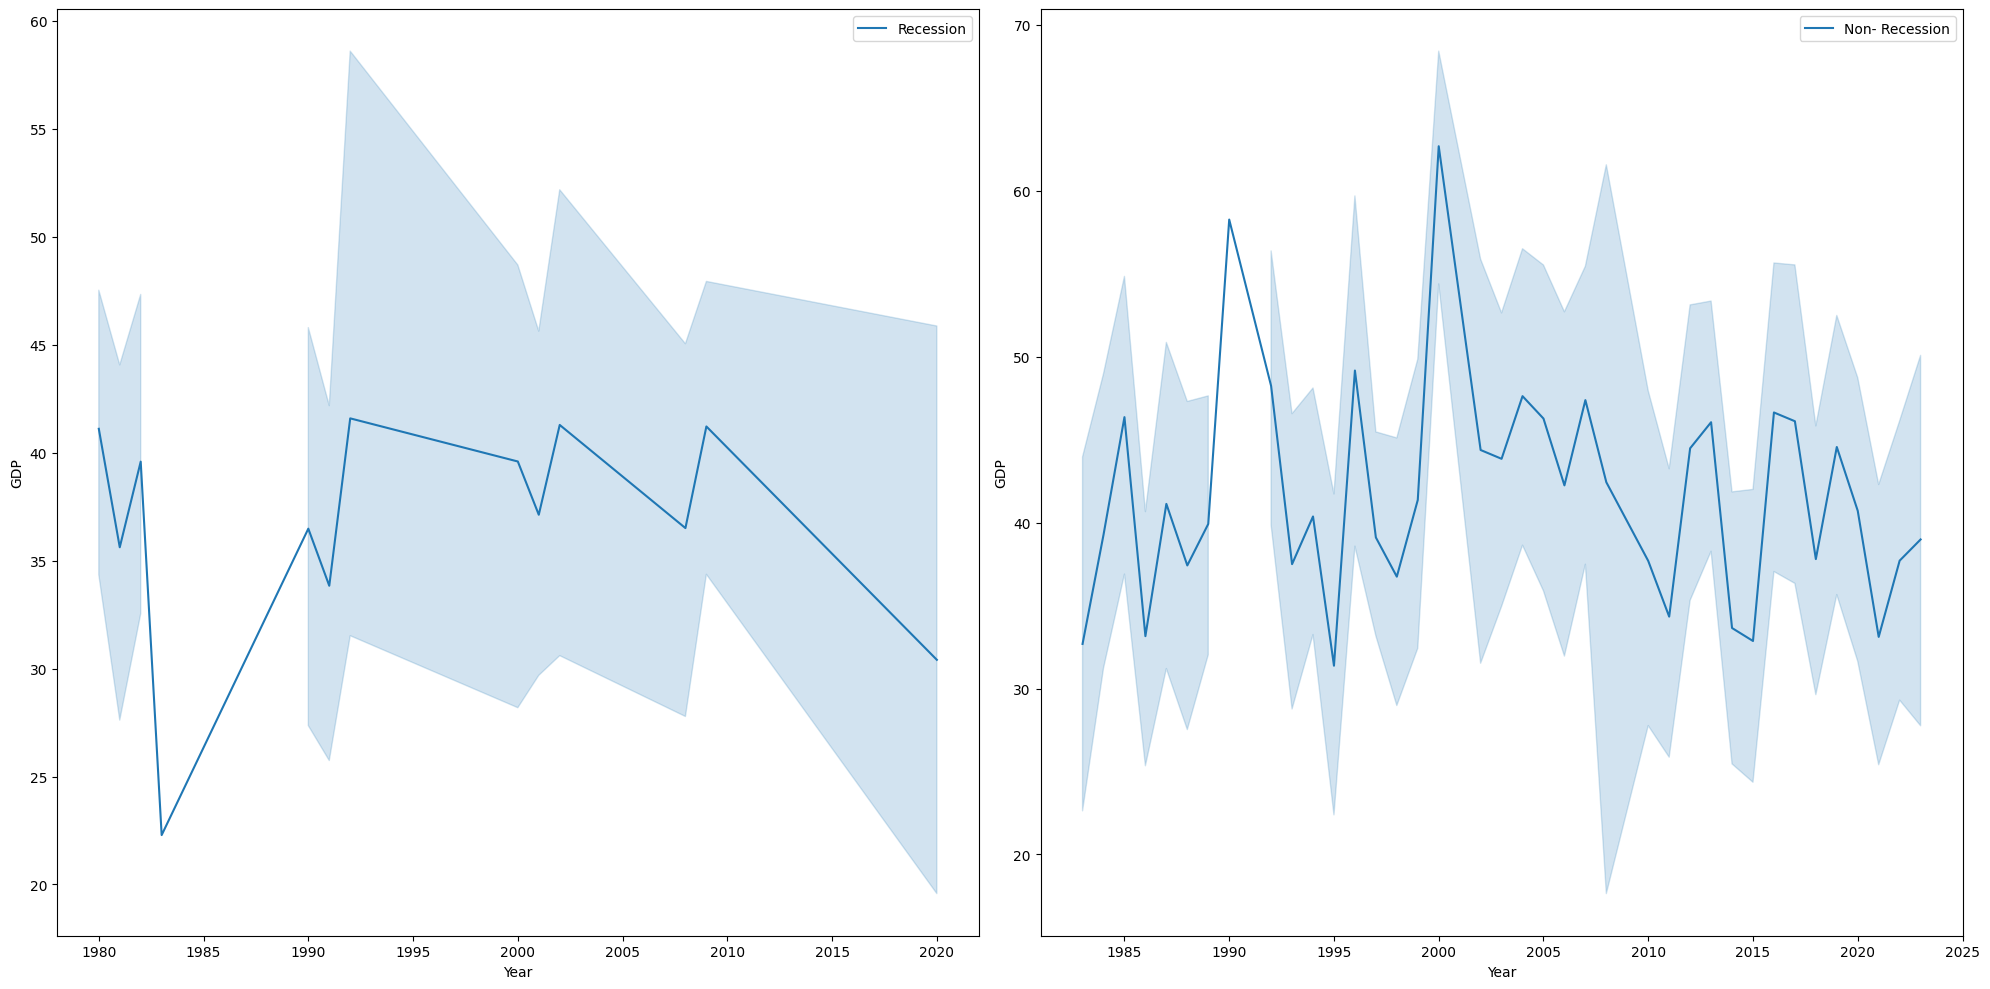

In [ ]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

plt.figure(figsize=(20,10))

    #subplot 1
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
    #subplot 1
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non- Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

plt.tight_layout()
plt.show()

Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

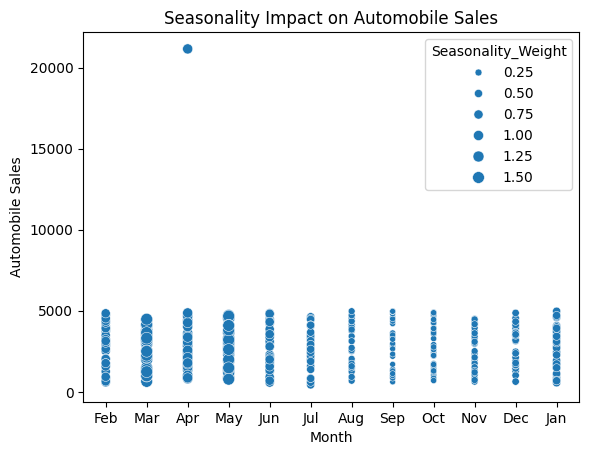

In [ ]:
# Filter data for non-recession years
non_rec_data = df[df['Recession'] == 0]

# Set the size of the bubbles based on Seasonality Weight
size = non_rec_data['Seasonality_Weight']

# Create a Bubble plot using scatterplot
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)

# You can include hue='Seasonality_Weight' and legend=False for additional features

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()

Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

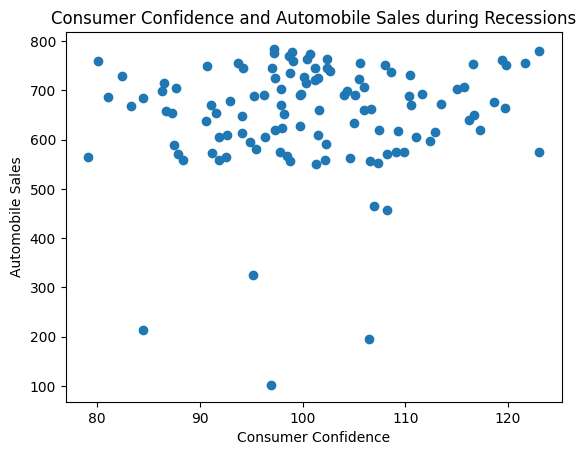

In [ ]:
# Create a dataframe for the recession period
rec_data = df[df['Recession'] == 1]

# Create a scatter plot to identify the correlation between Consumer Confidence and Automobile Sales during recessions
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.show()

How does the average vehicle price relate to the sales volume during recessions

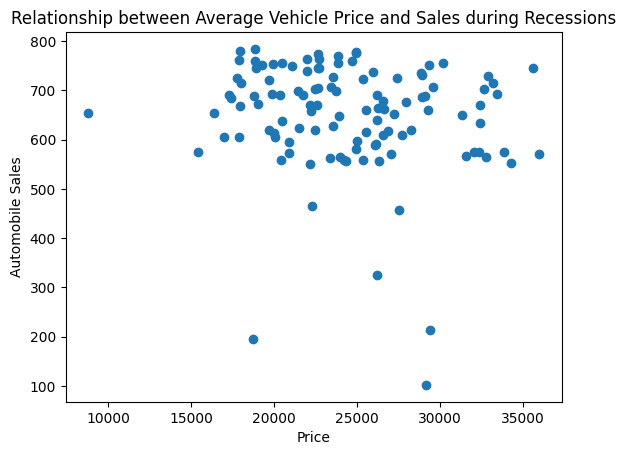

In [ ]:
rec_data = df[df['Recession'] == 1]

# Create a scatter plot to identify the correlation between Consumer Confidence and Automobile Sales during recessions
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

plt.show()

Pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

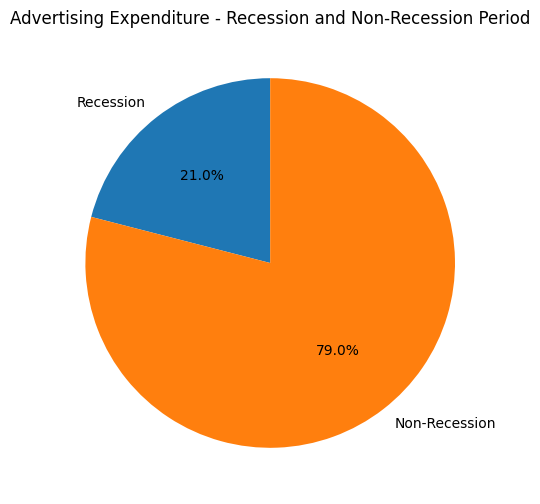

In [ ]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

    # Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure - Recession and Non-Recession Period')

plt.show()

Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

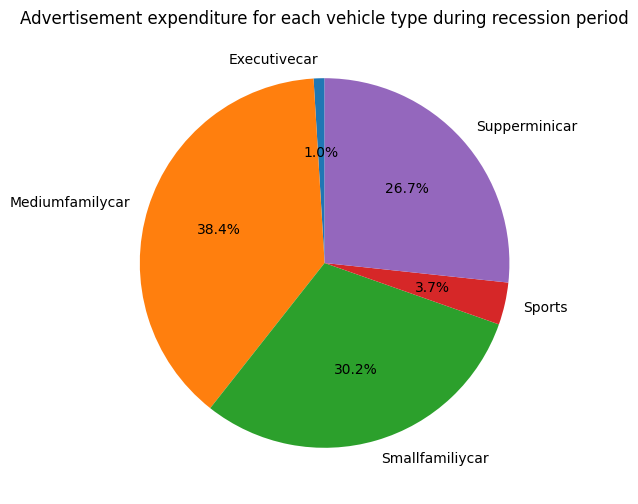

In [ ]:
Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

    # Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(10,6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertisement expenditure for each vehicle type during recession period')

plt.show()

 Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.


<ipython-input-25-6dfb950e4bf6>:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


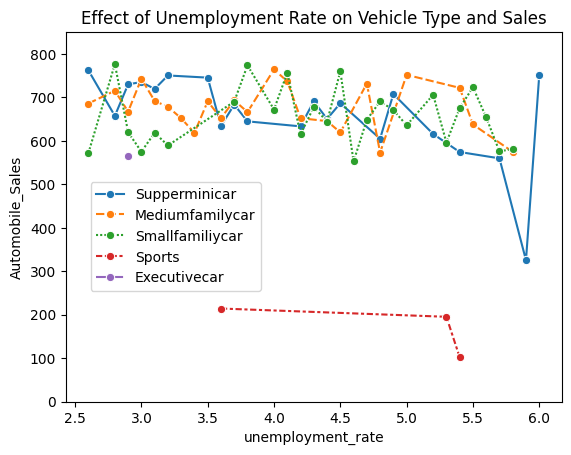

In [ ]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.show()

Create a map on the hightest sales region/offices of the company during recession period

In [ ]:
import folium

In [ ]:
import aiohttp
import aiofiles

async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                async with aiofiles.open(filename, 'wb') as f:
                    await f.write(await response.read())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

In [ ]:
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data='us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1

Dashboard
---


In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

# Load the data using pandas
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Set the title of the dashboard
#app.title = "Automobile Statistics Dashboard"

#---------------------------------------------------------------------------------
# Create the dropdown menu options
dropdown_options = [
    {'label': '...........', 'value': 'Yearly Statistics'},
    {'label': 'Recession Period Statistics', 'value': '.........'}
]
# List of years
year_list = [i for i in range(1980, 2024, 1)]
#---------------------------------------------------------------------------------------
# Create the layout of the app
app.layout = html.Div([
    #TASK 2.1 Add title to the dashboard
    html.H1("..............."),#May include style for title
    html.Div([#TASK 2.2: Add two dropdown menus
        html.Label("Select Statistics:"),
        dcc.Dropdown(
            id='...........',
            options=...................,
            value='.................',
            placeholder='.................'
        )
    ]),
    html.Div(dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in year_list],
            value='...................'
        )),
    html.Div([#TASK 2.3: Add a division for output display
    html.Div(id='..........', className='..........', style={.........}),])
])
#TASK 2.4: Creating Callbacks
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='......', component_property='....'),
    Input(component_id='..........',component_property='....'))

def update_input_container(.......):
    if selected_statistics =='........':
        return False
    else:
        return ......

#Callback for plotting
# Define the callback function to update the input container based on the selected statistics
@app.callback(
    Output(component_id='...', component_property='...'),
    [Input(component_id='...', component_property='...'), Input(component_id='...', component_property='...')])


def update_output_container(....., .....):
    if ..... == 'Recession Period Statistics':
        # Filter the data for recession periods
        recession_data = data[data['Recession'] == 1]

#TASK 2.5: Create and display graphs for Recession Report Statistics

#Plot 1 Automobile sales fluctuate over Recession Period (year wise)
        # use groupby to create relevant data for plotting
        yearly_rec=recession_data.groupby('...')['...'].mean().reset_index()
        R_chart1 = dcc.Graph(
            figure=px......(.....,
                x='....',
                y='......',
                title="Average Automobile Sales fluctuation over Recession Period"))

#Plot 2 Calculate the average number of vehicles sold by vehicle type
        # use groupby to create relevant data for plotting
        average_sales = ...............mean().reset_index()
        R_chart2  = dcc.Graph(figure=px....................

# Plot 3 Pie chart for total expenditure share by vehicle type during recessions
        # use groupby to create relevant data for plotting
        exp_rec= ....................
        R_chart3 = .............

# Plot 4 bar chart for the effect of unemployment rate on vehicle type and sales
        ................
        ...................


        return [
            html.Div(className='..........', children=[html.Div(children=R_chart1),html.Div(children=.....)],style={.....}),
            html.Div(className='chart-item', children=[html.Div(children=...........),html.Div(.............)],style={....})
            ]

# TASK 2.6: Create and display graphs for Yearly Report Statistics
 # Yearly Statistic Report Plots
    elif (input_year and selected_statistics=='...............') :
        yearly_data = data[data['Year'] == ......]

#TASK 2.5: Creating Graphs Yearly data

#plot 1 Yearly Automobile sales using line chart for the whole period.
        yas= data.groupby('Year')['Automobile_Sales'].mean().reset_index()
        Y_chart1 = dcc.Graph(figure=px.line(.................))

# Plot 2 Total Monthly Automobile sales using line chart.
        Y_chart2 = dcc.Graph(................)

            # Plot bar chart for average number of vehicles sold during the given year
        avr_vdata=yearly_data.groupby........................
        Y_chart3 = dcc.Graph( figure.................,title='Average Vehicles Sold by Vehicle Type in the year {}'.format(input_year)))

            # Total Advertisement Expenditure for each vehicle using pie chart
        exp_data=yearly_data.groupby(..................
        Y_chart4 = dcc.Graph(...............)

#TASK 2.6: Returning the graphs for displaying Yearly data
        return [
                html.Div(className='.........', children=[html.Div(....,html.Div(....)],style={...}),
                html.Div(className='.........', children=[html.Div(....),html.Div(....)],style={...})
                ]

    else:
        return None

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

